# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns   
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.io as pio
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [10]:
mapping = {
    "Internet": 0,
    "Mobile": 1
}

df["sales_channel"] = df["sales_channel"].map(mapping)

In [11]:
df['sales_channel'].value_counts()

0    44382
1     5618
Name: sales_channel, dtype: int64

In [12]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [13]:
mapping = {
    "RoundTrip": 0,
    "OneWay": 1,
    "CircleTrip": 2
}

df["trip_type"] = df["trip_type"].map(mapping)

In [14]:
df['trip_type'].value_counts()

0    49497
1      387
2      116
Name: trip_type, dtype: int64

In [15]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.112360,0.012380,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.129873,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,0.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,0.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,0.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


purchase_lead and length of stay needs more observation

In [16]:
fig = px.box(df, x='purchase_lead', title='Days between booking and flight')
fig.update_traces(marker_color='black', marker_line_color='black')
fig.update_layout(plot_bgcolor='white')
fig.show()

In [17]:
fig = px.box(df, x='length_of_stay', title='Days spent at Destination')
fig.update_traces(marker_color='black', marker_line_color='black')
fig.update_layout(plot_bgcolor='white')
fig.show()

In [18]:
df['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [19]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [20]:
df['flight_hour'].value_counts()

8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: flight_hour, dtype: int64

Flight hour of the day: 0 to 11 would be morning hours; 12-18 would be afternoon hours; 19-23 would be evening hours

In [21]:
df['flight_hour_of_the_day'] = df['flight_hour'].apply(lambda x: "0" if x <= 11 else ("1" if x <= 18 else "2"))

In [22]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_hour_of_the_day
0,2,0,0,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,0,0,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0
2,2,0,0,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1
3,1,0,0,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0
4,2,0,0,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1


In [23]:
df['flight_hour_of_the_day'].value_counts()

0    33287
1    14188
2     2525
Name: flight_hour_of_the_day, dtype: int64

In [24]:
result = df[df['booking_complete'] == 1].groupby('flight_hour_of_the_day').size().reset_index(name='Count')
result

,flight_hour_of_the_day,Count
0,0,4835
1,1,2377
2,2,266


Most number of booking were made in the morning hours

In [62]:
custom_color_sequence = ['gray', 'black']
fig = px.histogram(df, x='booking_complete' , title='Distribution of Booking Completion', color='booking_complete', color_discrete_sequence= custom_color_sequence)
fig.update_traces(marker=dict(color='gray_r'), selector=dict(type='bar'))

fig.show()

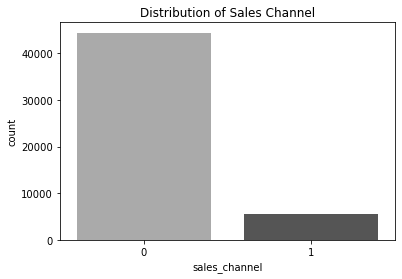

In [25]:

sns.countplot(data=df, x='sales_channel', palette='gray_r')
plt.title('Distribution of Sales Channel')
plt.show()

In [26]:
df.drop(columns=['flight_hour','route'], inplace=True)

In [27]:
y = df['booking_complete']
X = df.drop(columns=['booking_complete','booking_origin'])

In [28]:
columns_to_scale = ['purchase_lead', 'length_of_stay']

scaler = StandardScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_hour_of_the_day
0,2,0,0,1.957530,-0.119353,6,New Zealand,1,0,0,5.52,0,0
1,1,0,0,0.299164,-0.089844,6,New Zealand,0,0,0,5.52,0,0
2,2,0,0,1.747470,-0.030824,3,India,1,1,0,5.52,0,1
3,1,0,0,0.122272,0.234761,6,New Zealand,0,0,1,5.52,0,0
4,2,0,0,-0.187290,-0.030824,3,India,1,0,1,5.52,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,-0.640577,-0.502977,6,Australia,1,0,1,5.62,0,0
49996,1,0,0,0.288108,-0.502977,7,Australia,0,0,0,5.62,0,0
49997,1,0,0,-0.673744,-0.502977,6,Australia,0,0,1,5.62,0,2
49998,1,0,0,-0.773246,-0.502977,1,Australia,1,0,1,5.62,0,0


In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Models used:


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8520
           1       0.35      0.09      0.14      1480

    accuracy                           0.84     10000
   macro avg       0.60      0.53      0.53     10000
weighted avg       0.78      0.84      0.80     10000

[[8269  251]
 [1347  133]]


In [50]:
feature_importances = rf_classifier.feature_importances_

fig = px.bar(feature_importances,x = feature_importances, y = X.columns, orientation='h', title='Feature Importance Plot')

fig.update_layout(width=800, height=500)
fig.update_xaxes(title_text='Feature Importance')
fig.update_yaxes(title_text='Feature')

fig.show()

In [34]:
log_regressor = LogisticRegression(solver='lbfgs', max_iter=564) 
log_regressor.fit(X_train,y_train)

LogisticRegression(max_iter=564)

In [43]:
y_pred_lg = log_regressor.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lg)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred_lg, zero_division= 1)
print(report)

conf_matrix = confusion_matrix(y_test, y_pred_lg)
print(conf_matrix)

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       1.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.93      0.50      0.46     10000
weighted avg       0.87      0.85      0.78     10000

[[8520    0]
 [1480    0]]


In [44]:
coefficients = log_regressor.coef_[0]
feature_importance_logistic = pd.Series(coefficients, index=X.columns)
top_features = feature_importance_logistic.nlargest(10)
top_features_df = pd.DataFrame({'Feature': top_features.index, 'Coefficient Value': top_features.values})
fig = px.bar(top_features_df,x = 'Coefficient Value', y = 'Feature', title='Feature Importance Plot')

fig.update_layout(width=800, height=500)
fig.update_xaxes(title_text='Feature Importance')
fig.update_yaxes(title_text='Feature')

fig.show()

In [45]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [46]:
y_pred_svc = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred_svc, zero_division= 1)
print(report)

conf_matrix = confusion_matrix(y_test, y_pred_svc)
print(conf_matrix)

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       1.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.93      0.50      0.46     10000
weighted avg       0.87      0.85      0.78     10000

[[8520    0]
 [1480    0]]


In [54]:
result = df[df['booking_complete'] == 1].groupby('booking_origin').size().reset_index(name='Count')
sorted_df = result.sort_values(by='Count', ascending=False)
print(sorted_df)

          booking_origin  Count
26              Malaysia   2468
1              Australia    900
9                  China    694
17             Indonesia    615
20                 Japan    478
51              Thailand    470
45           South Korea    462
44             Singapore    299
50                Taiwan    224
16                 India    131
57               Vietnam    114
25                 Macau     95
55         United States     84
36           Philippines     75
15             Hong Kong     73
32           New Zealand     54
5                 Brunei     41
6               Cambodia     36
54        United Kingdom     21
0              (not set)     14
12                France     14
29       Myanmar (Burma)     13
13               Germany     12
42          Saudi Arabia     11
19                 Italy     11
24                  Laos      6
48                Sweden      5
38                 Qatar      5
27             Mauritius      4
49           Switzerland      3
30      